# Sustainable Aviation Fuel Case Study

This case study examines five pathways for sustainable aviation fuel production from a hydroprocessed esters and fatty acids (HEFA) biorefinery. The five pathways use different feedstocks:

* HEFA Camelina
* HEFA Castor
* HEFA Jatropha
* HEFA Pennycress
* HEFA Yellow Grease

and produce different quantities of jet blendstock along with gasoline, diesel, and propane co-products.

We examine how these biorefinery technologies might respond to investment in co-product revenue (CPR), overall process efficiency (OPE), and fatty acid composition (FAC). All technologies are modeled under a default scenario that includes no additional investment, called *State of Technology*. Then there are three levels of investments possible in each research category, resulting in the *Incremental Progress*, *Moderate Progress*, and *Leap Forward* investment scenarios.

### Dimensions and indices.

1.  Types of capital costs. 
    * For this study all capital costs are treated as one lump sum.
2.  Types of fixed cost. 
    * For this study all fixed (non-input-related) costs are treated as one lump sum.
3.  Inputs to the process. 
    * Feedstock *(feedstock type varies by technology)*
    * Raw Material *(includes all chemical, material, and energy inputs other than feedstock)*
4.  Outputs from the process. Not all technologies produce all outputs.
    * Jet (SAF)
    * Gasoline
    * Diesel
    * Propane
5.  Metrics. 
    * Jet GHG (kg CO2eq/gal)
    * Minimum jet selling price (MJSP)
6.  Parameters. 
    * Annual GHG (kg CO2eq)
    * Jet LHV (MJ/gal)
    * Discount Rate (unitless)
    * Depreciation Period (years)
    * Income Tax Rate (unitless)
    * All Capital (USD)
    * All Fixed (USD/year)
    * Diesel (gal/year)
    * Gasoline (gal/year)
    * Propane (gal/year)
    * Jet (gal/year)
    * Diesel Price (USD/gal)
    * Gasoline Price (USD/gal)
    * Propane Price (USD/gal)
    * Feedstock Price (USD/dry metric ton biomass or USD/dry ton oil)
    * Raw Material Price (USD/kg)

## Implement the technology model.

The implementation of a technology model consists of a capital cost function, a fixed cost function, a production function, and a metrics function.

See the [model](https://tyche.live/doc-src/formulation.html) documentation for more details.

The [src/technology/](../src/technology/) folder has examples of several technology models.

### Capital cost function.

The capital cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the capital costs for the technology.

Implement the capital cost function for your technology in the file [tutorial/my_technology.py](./).

In [32]:
def capital_cost(scale, parameter):
    """
    Capital cost function.

    Parameters
    ----------
    scale : float
      The scale of operation.
    parameter : array
      The technological parameterization.
    """
    _cap = parameter[5]

    # Stack the costs for each category into a single array that we return.
    return np.stack([_cap
    ])

### Fixed cost function.

The fixed cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the fixed costs for the technology.

Implement the fixed cost function for your technology in the file [tutorial/my_technology.py](./).

In [33]:
def fixed_cost(scale, parameter):
  """
  Fixed cost function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  parameter : array
    The technological parameterization.
  """
  _fix = parameter[6]

  # Stack the costs for each category into a single array that we return.
  return np.stack([_fix
  ])

### Production function.

The production function takes the scale of the operations, the capital costs, the lifetime, the fixed costs, and the array of technology parameters as arguments and it returns the production (outputs) for the technology.

Implement the production function for your technology in the file [tutorial/my_technology.py](./).

In [34]:
def production(scale, capital, lifetime, fixed, input, parameter):
  """
  Production function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input : array
    Input quantities.
  parameter : array
    The technological parameterization.
  """

  _out = parameter[12]

  # Stack the output for each category into a single array that we return.
  return np.stack([_out
  ])

### Metric function.

The metric function takes information on costs, inputs, outputs, and parameters and it returns the metrics for the technology.

Implement the metrics function for your technology in the file [tutorial/my_technology.py](./).

In [35]:
def metrics(scale, capital, lifetime, fixed, input_raw, input, output_raw, output, cost, parameter):
  """
  Metrics function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input_raw : array
    Raw input quantities (before losses).
  input : array
    Input quantities.
  output_raw : array
    Raw output quantities (before losses).
  output : array
    Output quantities.
  cost : array
    Costs.
  parameter : array
    The technological parameterization.
  """

  # annual fossil GHG emissions, Units: kg CO2-eq/year
  ghg_foss_ann = parameter[0]

  # jet fuel LHV (MJ/gal)
  lhv = parameter[1]

  # Discount rate, Unitless
  dr = parameter[2]
  # Depreciation period for all equipment except utilities, Units: years
  dp = parameter[3]
  # Income tax rate, Units: years
  tr = parameter[4]
  # total capital cost, Units: USD
  cap = parameter[5]
  # Annual fixed (non-input) costs, Units: USD/year
  fix = parameter[6]

  # co-product amounts
  ddgs = parameter[7]
  elec = parameter[8]
  dsl = parameter[9]
  gas = parameter[10]
  ppn = parameter[11]
  jet = parameter[12]

  # co-product prices
  ddgs_p = parameter[13]
  elec_p = parameter[14]
  dsl_p = parameter[15]
  gas_p = parameter[16]
  ppn_p = parameter[17]

  # input prices
  fd_p = parameter[18]
  mat_p = parameter[19]

  # input amounts
  fd = input_raw[0]
  mat = input_raw[1]

  # equipment lifetime
  els = lifetime[0]

  mjsp_bench = parameter[20]
  ghg_bench = parameter[21]

  # FOSSIL GHG: kg CO2-eq/gal SAF
  ghg_foss = ghg_foss_ann / (jet * lhv)

  # MINIMUM FUEL SELLING PRICE: USD/gal SAF

  # total project investment, Units: USD
  tpi = cap

  # depreciation costs, units: USD/year
  dc = cap / dp

  # operating costs, units: USD/year
  oc = fd * fd_p + mat * mat_p + fix

  # tpi discount factor, Units: unitless
  df_tpi = (dr * (1 + dr) ** els) / ((1 + dr) ** els - 1)

  # total revenue from SAF sales, Units: USD/year
  br = ((1 - tr) * oc - tr * dc + df_tpi * tpi) / (1 - tr)

  # revenue from co-product sales, Units: USD/year
  cr = ddgs * ddgs_p + elec * elec_p + dsl * dsl_p + gas * gas_p + ppn * ppn_p

  # MJSP, Units: USD/gal SAF
  mjsp = (br + cr) / output[0]

  # Package results.
  return np.stack([ghg_bench - ghg_foss,
                   mjsp_bench - mjsp
  ])

## Simulate the base case or reference scenario.

Load the data. Compile the production and metric functions for each technology in the dataset. Compute an ensemble of 1000 simulations for the State of Technology (no investment) case.

In [36]:
import os
import sys

sys.path.insert(1, os.path.abspath("../../src"))

import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

saf_loc = "../../tutorial/data/saf"

designs = ty.Designs(saf_loc)
designs.compile()

In [37]:
designs.evaluate_scenarios(sample_count=1)

Evaluating HEFA Camelina
Evaluating HEFA Castor
Evaluating HEFA Jatropha
Evaluating HEFA Pennycress
Evaluating HEFA Yellow Grease


Value  \
Technology         Scenario             Sample Variable Index                                
HEFA Camelina      Incremental Progress 1      Cost     Cost                  3.723634e+08   
                                               Metric   Jet GHG               2.963860e-02   
                                                        MJSP                  8.867593e+00   
                                                        Reduction in Jet GHG  1.736140e-02   
                                                        Reduction in MJSP     8.043537e-01   
...                                                                                    ...   
HEFA Yellow Grease State of Technology  1      Output   Diesel                2.000000e+05   
                                                        Electricity           0.000000e+00   
                                                        Gasoline              2.420000e+07   
                                                        Jet                   5.040000e+07   
                                                        Propane               4.000000e+05   

                                                                                    Units  
Technology         Scenario             Sample Variable Index                              
HEFA Camelina      Incremental Progress 1      Cost     Cost                     USD/year  
                                               Metric   Jet GHG               kg CO2eq/MJ  
                                                        MJSP                      USD/gal  
                                                        Reduction in Jet GHG  kg CO2eq/MJ  
                                                        Reduction in MJSP         USD/gal  
...                                                                                   ...  
HEFA Yellow Grease State of Technology  1      Output   Diesel                   gal/year  
                                                        Electricity              kWh/year  
                                                        Gasoline                 gal/year  
                                                        Jet                      gal/year  
                                                        Propane                  gal/year  

[220 rows x 2 columns]

In [38]:
saf_sot = designs.evaluate_scenarios(
    sample_count=1
).xs(
    "State of Technology",
    level = "Scenario",
    drop_level = False
)
saf_sot

Evaluating HEFA Camelina
Evaluating HEFA Castor
Evaluating HEFA Jatropha
Evaluating HEFA Pennycress
Evaluating HEFA Yellow Grease


Value  \
Technology         Scenario            Sample Variable Index                                
HEFA Camelina      State of Technology 1      Cost     Cost                  3.701930e+08   
                                              Metric   Jet GHG               4.700000e-02   
                                                       MJSP                  9.671947e+00   
                                                       Reduction in Jet GHG  0.000000e+00   
                                                       Reduction in MJSP    -3.065863e-07   
                                              Output   DDGS                  0.000000e+00   
                                                       Diesel                1.200000e+06   
                                                       Electricity           0.000000e+00   
                                                       Gasoline              2.590000e+07   
                                                       Jet                   5.770000e+07   
                                                       Propane               2.600000e+05   
HEFA Castor        State of Technology 1      Cost     Cost                  3.561882e+08   
                                              Metric   Jet GHG               5.300000e-02   
                                                       MJSP                  1.032857e+01   
                                                       Reduction in Jet GHG  0.000000e+00   
                                                       Reduction in MJSP    -4.994705e-06   
                                              Output   DDGS                  0.000000e+00   
                                                       Diesel                1.000000e+05   
                                                       Electricity           0.000000e+00   
                                                       Gasoline              2.460000e+07   
                                                       Jet                   5.080000e+07   
                                                       Propane               5.000000e+05   
HEFA Jatropha      State of Technology 1      Cost     Cost                  4.948606e+07   
                                              Metric   Jet GHG               5.500000e-02   
                                                       MJSP                  5.008918e+00   
                                                       Reduction in Jet GHG  0.000000e+00   
                                                       Reduction in MJSP     3.088630e-07   
                                              Output   DDGS                  0.000000e+00   
                                                       Diesel                8.000000e+05   
                                                       Electricity           0.000000e+00   
                                                       Gasoline              2.440000e+07   
                                                       Jet                   4.400000e+07   
                                                       Propane               4.700000e+06   
HEFA Pennycress    State of Technology 1      Cost     Cost                  1.356656e+08   
                                              Metric   Jet GHG               3.270000e-02   
                                                       MJSP                  8.284299e+00   
                                                       Reduction in Jet GHG  0.000000e+00   
                                                       Reduction in MJSP     1.043164e-07   
                                              Output   DDGS                  0.000000e+00   
                                                       Diesel                9.500000e+06   
                                                       Electricity           0.000000e+00   
                                                       Gasoline              1.920000

## Simulate effects of R&D.

### Simulating implications of expert elicitation.

In [39]:
saf_experts = designs.evaluate_scenarios(sample_count=1000)
saf_experts

Evaluating HEFA Camelina
Evaluating HEFA Castor
Evaluating HEFA Jatropha
Evaluating HEFA Pennycress
Evaluating HEFA Yellow Grease


Value  \
Technology         Scenario             Sample Variable Index                                
HEFA Camelina      Incremental Progress 1      Cost     Cost                  3.784192e+08   
                                               Metric   Jet GHG               3.297962e-02   
                                                        MJSP                  9.815633e+00   
                                                        Reduction in Jet GHG  1.402038e-02   
                                                        Reduction in MJSP    -1.436859e-01   
...                                                                                    ...   
HEFA Yellow Grease State of Technology  1000   Output   Diesel                2.000000e+05   
                                                        Electricity           0.000000e+00   
                                                        Gasoline              2.420000e+07   
                                                        Jet                   5.040000e+07   
                                                        Propane               4.000000e+05   

                                                                                    Units  
Technology         Scenario             Sample Variable Index                              
HEFA Camelina      Incremental Progress 1      Cost     Cost                     USD/year  
                                               Metric   Jet GHG               kg CO2eq/MJ  
                                                        MJSP                      USD/gal  
                                                        Reduction in Jet GHG  kg CO2eq/MJ  
                                                        Reduction in MJSP         USD/gal  
...                                                                                   ...  
HEFA Yellow Grease State of Technology  1000   Output   Diesel                   gal/year  
                                                        Electricity              kWh/year  
                                                        Gasoline                 gal/year  
                                                        Jet                      gal/year  
                                                        Propane                  gal/year  

[220000 rows x 2 columns]

In [40]:
# techs = tranche_results.summary.index.get_level_values('Technology').unique()
saf_designs.indices.xs(
    ("Metric"),
    level=("Type"),
)
saf_designs.indices.index.get_level_values('Index').unique()

Index(['Capital', 'Fixed', 'Feedstock', 'Raw Material', 'Jet GHG', 'MJSP',
       'Reduction in Jet GHG', 'Reduction in MJSP', 'DDGS', 'Diesel',
       'Electricity', 'Gasoline', 'Jet', 'Propane', 'Annual GHG', 'DDGS Price',
       'Depreciation Period', 'Diesel Price', 'Discount Rate',
       'Electricity Price', 'Feedstock Price', 'Gasoline Price',
       'Income Tax Rate', 'Jet LHV', 'Propane Price', 'Raw Material Price'],
      dtype='object', name='Index')

In [41]:
saf_experts.xs(
    ("Metric", "Reduction in MJSP"),
    level=("Variable","Index")
).reset_index(
).replace(
    "State of Technology",
    "State of\nTechnology"
).replace(
    "Incremental Progress",
    "Incremental\nProgress"
).replace(
    "Moderate Progress",
    "Moderate\nProgress"
).replace(
    "Leap Forward",
    "Leap\nForward"
)

#.replace(
#    to_replace=["State of Technology","Incremental Progress","Moderate Progress","Leap Forward"],
#    value=["State of\nTechnology","Incremental\nProgress","Moderate\nProgress","Leap\nForward"],
#    inplace=True
#)



,Technology,Scenario,Sample,Value,Units
0,HEFA Camelina,Incremental\nProgress,1,-1.436859e-01,USD/gal
1,HEFA Camelina,Incremental\nProgress,2,-5.507623e-02,USD/gal
2,HEFA Camelina,Incremental\nProgress,3,1.301667e-01,USD/gal
3,HEFA Camelina,Incremental\nProgress,4,-5.380148e-02,USD/gal
4,HEFA Camelina,Incremental\nProgress,5,1.234168e-01,USD/gal
...,...,...,...,...,...
19995,HEFA Yellow Grease,State of\nTechnology,996,1.589280e-07,USD/gal
19996,HEFA Yellow Grease,State of\nTechnology,997,1.589280e-07,USD/gal
19997,HEFA Yellow Grease,State of\nTechnology,998,1.589280e-07,USD/gal
19998,HEFA Yellow Grease,State of\nTechnology,999,1.589280e-07,USD/gal


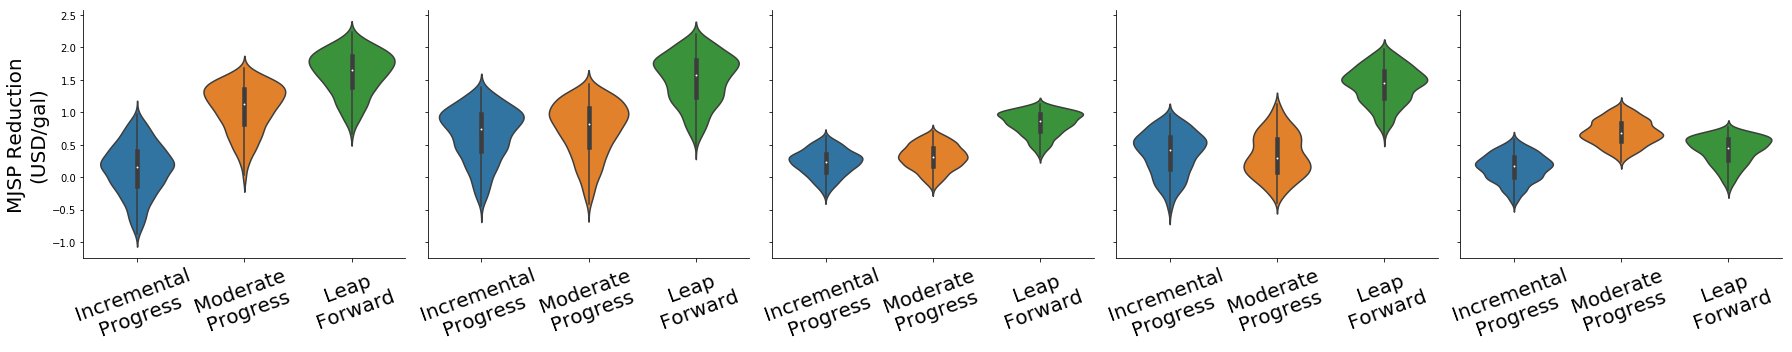

In [42]:
sb.catplot(
    x = "Scenario",
    y = "Value",
    col ="Technology",
    order = ["Incremental\nProgress",
             "Moderate\nProgress",
             "Leap\nForward"],
    data = saf_experts.xs(
        ("Metric", "Reduction in MJSP"),
        level=("Variable","Index")
    ).reset_index(
    ).replace(
        "State of Technology",
        "State of\nTechnology"
    ).replace(
        "Incremental Progress",
        "Incremental\nProgress"
    ).replace(
        "Moderate Progress",
        "Moderate\nProgress"
    ).replace(
        "Leap Forward",
        "Leap\nForward"
    ),
    kind="violin",
    split=True
).set(
    xlabel = None,
    title = None
).set_xticklabels(
    rotation=20,
    size=20
).set_ylabels(
    "MJSP Reduction\n(USD/gal)",
    size=20
);
pl.tight_layout()
pl.savefig('mjsp-sot-violin-alltechs.png')

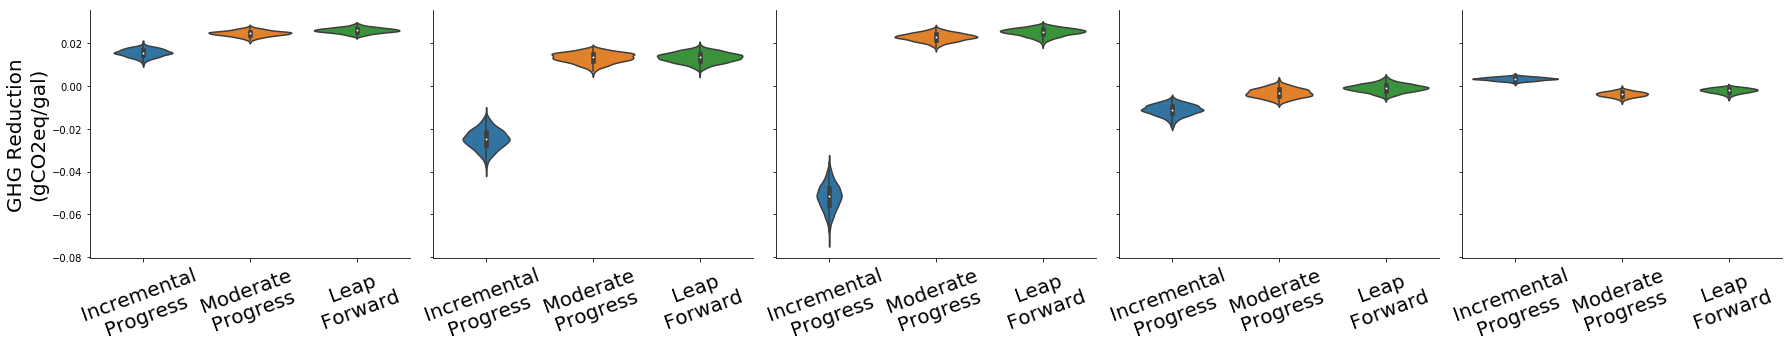

In [43]:
sb.catplot(
    x = "Scenario",
    y = "Value",
    col ="Technology",
    order = ["Incremental\nProgress",
             "Moderate\nProgress",
             "Leap\nForward"],
    data = saf_experts.xs(
        ("Metric", "Reduction in Jet GHG"),
        level=("Variable","Index")
    ).reset_index(
    ).replace(
        "State of Technology",
        "State of\nTechnology"
    ).replace(
        "Incremental Progress",
        "Incremental\nProgress"
    ).replace(
        "Moderate Progress",
        "Moderate\nProgress"
    ).replace(
        "Leap Forward",
        "Leap\nForward"
    ),
    kind="violin",
    split=True
).set(
    xlabel = None,
    title = None
).set_xticklabels(
    rotation=20,
    size=20
).set_ylabels(
    "GHG Reduction\n(gCO2eq/gal)",
    size=20
);
pl.tight_layout()
pl.savefig('ghg-sot-violin-alltechs.png')

## Analyzing investments.

In [44]:
saf_designs = ty.Designs(saf_loc)
saf_investments = ty.Investments(saf_loc)
saf_designs.compile()
tranche_results = saf_investments.evaluate_tranches(saf_designs,
                                                    sample_count=1000)

Evaluating HEFA Camelina
Evaluating HEFA Castor
Evaluating HEFA Jatropha
Evaluating HEFA Pennycress
Evaluating HEFA Yellow Grease


Filter down to one technology, since the dataset has seven and the functions aren't written to handle more than one at a time. Then step through and optimize each technology individually for MJSP.

In [45]:
opt_results = []

techs = tranche_results.summary.index.get_level_values('Technology').unique()

for i in techs:
    tranche_tech_results = tranche_results.summary[
        tranche_results.summary.index.get_level_values('Technology') == i
    ]
    evaluator = ty.Evaluator(
        saf_investments.tranches, tranche_tech_results
    )
    optimizer = ty.EpsilonConstraintOptimizer(
        evaluator
    )
    metric_max = optimizer.max_metrics()
    w = optimizer.maximize_slsqp(
        "Reduction in MJSP",
        total_amount = 5000000
    )
    print(f"{i} - {w[1]}")
    opt_dict = {
        'Technology': i,
        'Optimizer status': w[1],
        'Investment amounts': w[2],
        'Optimum metrics': w[3],
        'Maximum metrics': metric_max
    }
    opt_results.append(
        opt_dict
    )
    del tranche_tech_results, evaluator, optimizer, metric_max, w
opt_results

HEFA Camelina - Optimization terminated successfully.
HEFA Castor - Optimization terminated successfully.
HEFA Jatropha - Optimization terminated successfully.
HEFA Pennycress - Optimization terminated successfully.
HEFA Yellow Grease - Optimization terminated successfully.


[{'Technology': 'HEFA Camelina',
  'Optimizer status': 'Optimization terminated successfully.',
  'Investment amounts': Category
  Co-Product Revenue            6.066863e-06
  Fatty Acid Composition        2.600000e+06
  Overall Process Efficiency    2.400000e+06
  Name: Amount, dtype: float64,
  'Optimum metrics': Index
  Jet GHG                  0.090847
  MJSP                    26.555042
  Reduction in Jet GHG     0.050153
  Reduction in MJSP        2.460799
  Name: Value, dtype: float64,
  'Maximum metrics': Jet GHG                  0.141000
  MJSP                    29.015842
  Reduction in Jet GHG     0.078135
  Reduction in MJSP        4.803662
  Name: Value, dtype: float64},
 {'Technology': 'HEFA Castor',
  'Optimizer status': 'Optimization terminated successfully.',
  'Investment amounts': Category
  Co-Product Revenue            5.500001e+05
  Fatty Acid Composition        1.750000e+06
  Overall Process Efficiency    2.700000e+06
  Name: Amount, dtype: float64,
  'Optimum me

#### Find the largest reduction in MJSP if only 5M USD can be spent and only 2M USD can be spent in each category.

In [46]:
opt_results = []

techs = tranche_results.summary.index.get_level_values('Technology').unique()

for i in techs:
    tranche_tech_results = tranche_results.summary[
        tranche_results.summary.index.get_level_values('Technology') == i
    ]
    evaluator = ty.Evaluator(
        saf_investments.tranches, tranche_tech_results
    )
    optimizer = ty.EpsilonConstraintOptimizer(
        evaluator
    )
    metric_max = optimizer.max_metrics()
    w = optimizer.maximize_slsqp(
        "Reduction in MJSP",
        total_amount = 5000000,
        max_amount = pd.Series(
            [2000000, 2000000, 2000000],
            index=["OPE Investment Only", "CPR Investment Only", "FAC Investment Only"]
        )
    )
    print(f"{i} - {w[1]}")
    opt_dict = {
        'Technology': i,
        'Optimizer status': w[1],
        'Investment amounts': w[2],
        'Optimum metrics': w[3],
        'Maximum metrics': metric_max
    }
    opt_results.append(
        opt_dict
    )
opt_results

HEFA Camelina - Optimization terminated successfully.
HEFA Castor - Optimization terminated successfully.
HEFA Jatropha - Optimization terminated successfully.
HEFA Pennycress - Optimization terminated successfully.
HEFA Yellow Grease - Optimization terminated successfully.


[{'Technology': 'HEFA Camelina',
  'Optimizer status': 'Optimization terminated successfully.',
  'Investment amounts': Category
  Co-Product Revenue            1000000.0
  Fatty Acid Composition        2000000.0
  Overall Process Efficiency    2000000.0
  Name: Amount, dtype: float64,
  'Optimum metrics': Index
  Jet GHG                  0.089640
  MJSP                    27.382503
  Reduction in Jet GHG     0.051360
  Reduction in MJSP        1.633338
  Name: Value, dtype: float64,
  'Maximum metrics': Jet GHG                  0.141000
  MJSP                    29.015842
  Reduction in Jet GHG     0.078135
  Reduction in MJSP        4.803662
  Name: Value, dtype: float64},
 {'Technology': 'HEFA Castor',
  'Optimizer status': 'Optimization terminated successfully.',
  'Investment amounts': Category
  Co-Product Revenue            1.250000e+06
  Fatty Acid Composition        1.750000e+06
  Overall Process Efficiency    2.000000e+06
  Name: Amount, dtype: float64,
  'Optimum metrics': I

In [47]:
opt_results = []

i = 'HEFA Camelina'

tranche_tech_results = tranche_results.summary[
    tranche_results.summary.index.get_level_values('Technology') == i
]
evaluator = ty.Evaluator(
    saf_investments.tranches, tranche_tech_results
)
optimizer = ty.EpsilonConstraintOptimizer(
    evaluator
)
metric_max = optimizer.max_metrics()

w = optimizer.maximize_slsqp(
    "Reduction in Jet GHG",
    total_amount = 5000000,
    max_amount = pd.Series(
        [2000000, 2000000, 2000000],
        index=["OPE Investment Only",
               "CPR Investment Only",
               "FAC Investment Only"]
    )
)
print(f"{i} - {w[1]}")
opt_dict = {
    'Technology': i,
    'Optimizer status': w[1],
    'Investment amounts': w[2],
    'Optimum metrics': w[3],
    'Maximum metrics': metric_max
}

opt_dict

HEFA Camelina - Optimization terminated successfully.


{'Technology': 'HEFA Camelina',
 'Optimizer status': 'Optimization terminated successfully.',
 'Investment amounts': Category
 Co-Product Revenue            1.538388e+06
 Fatty Acid Composition        1.661611e+06
 Overall Process Efficiency    1.800001e+06
 Name: Amount, dtype: float64,
 'Optimum metrics': Index
 Jet GHG                  0.088979
 MJSP                    27.746148
 Reduction in Jet GHG     0.052021
 Reduction in MJSP        1.269693
 Name: Value, dtype: float64,
 'Maximum metrics': Jet GHG                  0.141000
 MJSP                    29.015842
 Reduction in Jet GHG     0.078135
 Reduction in MJSP        4.803662
 Name: Value, dtype: float64}

Use the epsilon constraint method to explore the trade-off between reducing MJSP and reducing jet GHG for the HEFA castor technology. For this demonstration, the \\$2M cap on funding for each research area is removed, leaving only the \\$5M total funding cap.

In [60]:
opt_results = []

i = 'HEFA Castor'

tranche_tech_results = tranche_results.summary[
    tranche_results.summary.index.get_level_values('Technology') == i
]
evaluator = ty.Evaluator(
    saf_investments.tranches, tranche_tech_results
)
optimizer = ty.EpsilonConstraintOptimizer(
    evaluator
)
metric_max = optimizer.max_metrics()

ghg = optimizer.maximize_slsqp(
    "Reduction in Jet GHG",
    total_amount = 5000000
)
print(f"{ghg[1]}")
opt_results = [
    {
        'Optimum metrics': ghg[3]
    }
]
mjsp = optimizer.maximize_slsqp(
    "Reduction in MJSP",
    total_amount = 5000000
)
print(f"{mjsp[1]}")
opt_results.append([
    {
        'Optimum metrics': mjsp[3]
    }
])

opt_results
ghg.amounts

Optimization terminated successfully.
Optimization terminated successfully.


Category
Co-Product Revenue            1.561685e-09
Fatty Acid Composition        1.037365e-09
Overall Process Efficiency    7.442891e-10
Name: Amount, dtype: float64

In [58]:
tranche_results.summary

Value  \
Category                   Technology         Tranche Sample Index                                
Co-Product Revenue         HEFA Camelina      CPR 1   1      Jet GHG               3.478146e-02   
                                                             MJSP                  1.003762e+01   
                                                             Reduction in Jet GHG  1.221854e-02   
                                                             Reduction in MJSP    -3.656682e-01   
                                                      2      Jet GHG               3.040303e-02   
...                                                                                         ...   
Overall Process Efficiency HEFA Yellow Grease OPE 0   999    Reduction in MJSP     1.589280e-07   
                                                      1000   Jet GHG               1.720000e-02   
                                                             MJSP                  5.287310e+00   
                                                             Reduction in Jet GHG  0.000000e+00   
                                                             Reduction in MJSP     1.589280e-07   

                                                                                         Units  
Category                   Technology         Tranche Sample Index                              
Co-Product Revenue         HEFA Camelina      CPR 1   1      Jet GHG               kg CO2eq/MJ  
                                                             MJSP                      USD/gal  
                                                             Reduction in Jet GHG  kg CO2eq/MJ  
                                                             Reduction in MJSP         USD/gal  
                                                      2      Jet GHG               kg CO2eq/MJ  
...                                                                                        ...  
Overall Process Efficiency HEFA Yellow Grease OPE 0   999    Reduction in MJSP         USD/gal  
                                                      1000   Jet GHG               kg CO2eq/MJ  
                                                             MJSP                      USD/gal  
                                                             Reduction in Jet GHG  kg CO2eq/MJ  
                                                             Reduction in MJSP         USD/gal  

[240000 rows x 2 columns]

In [57]:
tranche_results.summary[
    tranche_results.summary.index.get_level_values('Technology') == i
]

Value  \
Category                   Technology  Tranche Sample Index                             
Co-Product Revenue         HEFA Castor CPR 1   1      Jet GHG                0.082215   
                                                      MJSP                  10.220967   
                                                      Reduction in Jet GHG  -0.029215   
                                                      Reduction in MJSP      0.107603   
                                               2      Jet GHG                0.077960   
...                                                                               ...   
Overall Process Efficiency HEFA Castor OPE 0   999    Reduction in MJSP     -0.000005   
                                               1000   Jet GHG                0.053000   
                                                      MJSP                  10.328575   
                                                      Reduction in Jet GHG   0.000000   
                                                      Reduction in MJSP     -0.000005   

                                                                                  Units  
Category                   Technology  Tranche Sample Index                              
Co-Product Revenue         HEFA Castor CPR 1   1      Jet GHG               kg CO2eq/MJ  
                                                      MJSP                      USD/gal  
                                                      Reduction in Jet GHG  kg CO2eq/MJ  
                                                      Reduction in MJSP         USD/gal  
                                               2      Jet GHG               kg CO2eq/MJ  
...                                                                                 ...  
Overall Process Efficiency HEFA Castor OPE 0   999    Reduction in MJSP         USD/gal  
                                               1000   Jet GHG               kg CO2eq/MJ  
                                                      MJSP                      USD/gal  
                                                      Reduction in Jet GHG  kg CO2eq/MJ  
                                                      Reduction in MJSP         USD/gal  

[48000 rows x 2 columns]

In [56]:
mjsp.amounts

Category
Co-Product Revenue            5.500001e+05
Fatty Acid Composition        1.750000e+06
Overall Process Efficiency    2.700000e+06
Name: Amount, dtype: float64

In [49]:
def pct_diff(bench, reduction):
    return 100.0 * (bench - reduction) / bench

def find_const(bench, pct_diff):
    return bench * (1 - pct_diff/100.0)

In [50]:
mjsp_bench = 10.32857
ghg_bench = 0.053

maxmjsp_mjsp = pct_diff(mjsp_bench, mjsp[3]['Reduction in MJSP'])
maxmjsp_ghg = pct_diff(ghg_bench, mjsp[3]['Reduction in Jet GHG'])
maxghg_mjsp = pct_diff(mjsp_bench, ghg[3]['Reduction in MJSP'])
maxghg_ghg = pct_diff(ghg_bench, ghg[3]['Reduction in Jet GHG'])

In [51]:
maxmjsp_ghg

135.26748434385038

In [52]:
maxmjsp_mjsp

76.89520857333645

In [53]:
maxghg_mjsp

100.00014507442954

In [54]:
maxghg_ghg

100.00000000000009

In [55]:
eps_results = []

i = 'HEFA Castor'

tranche_tech_results = tranche_results.summary[
    tranche_results.summary.index.get_level_values('Technology') == i
]
evaluator = ty.Evaluator(
    saf_investments.tranches, tranche_tech_results
)
optimizer = ty.EpsilonConstraintOptimizer(
    evaluator
)

for j in np.arange(100, 320, 20):

    w = optimizer.maximize_slsqp(
        "Reduction in MJSP",
        total_amount = 5000000,
        min_metric   = pd.Series(
            [find_const(ghg_bench, j)],
            name="Value",
            index = ["Reduction in Jet GHG"]
        ),
    )
    print(f"{j}, {find_const(ghg_bench, j)}: {w[1]}")
    
    if w[1] == 'Optimization terminated successfully':
        eps_results.append({
            'GHG Percentage of Bench': j,
            'MJSP Percentage of Bench': pct_diff(mjsp_bench, w[3][3]),
            'Jet GHG Reduction': find_const(ghg_bench, j),
            'Optimum MJSP Reduction': w[3][3]
        })

eps_results

100, 0.0: Optimization terminated successfully.
120, -0.010599999999999997: Optimization terminated successfully.
140, -0.021199999999999993: Optimization terminated successfully.
160, -0.0318: Optimization terminated successfully.
180, -0.0424: Optimization terminated successfully.
200, -0.053: Optimization terminated successfully.
220, -0.0636: Optimization terminated successfully.
240, -0.07419999999999999: Optimization terminated successfully.
260, -0.0848: Optimization terminated successfully.
280, -0.09539999999999998: Optimization terminated successfully.
300, -0.106: Optimization terminated successfully.


[]